# iOS Simple App

## Overview

**What you'll learn**

In this section you'll learn

 1. How to use the APIs that come with different templates (SpriteKit, RealityKit, ARKit) 

**Prerequisites**

Before starting this section, you should have an understanding of

 1. Experience with programming in any language
 2. Have Xcode installed on your computer

**Introduction**

something

kate's stuff

## APIs and Templates

Now that you have a bit of experience building an app with Xcode, you can branch out a bit! Remember when we chose **App** as our template when setting up a project? What would happen if we chose **Game** or **Augmented Reality App** as the template?

When you choose a template, you're choosing what files Xcode should set up for you and what APIs it should include for you. API stands for Application Programming Interface, which means it lets you easily use code other people have written in your own project. You only need a basic understanding of APIs to do this section. If you're interested in learning more about them, you can checkout our Webscraping and APIs workshop [here](https://github.com/HackBinghamton/Webscraping-APIsWorkshop). 

We're going to take a look at the two different templates that were mentioned earlier, **Game** and **Augmented Reality App**.

**Game Template**

When you create a Game template, you have a few different options for your **Game Technology**. You can choose between RealityKit, SceneKit, SpriteKit, and Metal. You also have the option to additionally integrate GameplayKit, which is a useful framework for making gameplay easier. We're going to take a look at **SpriteKit**. 

The Game template includes some files we haven't seen before. We have GameScene.sks, Actions.sks, GameScene.swift, and GameViewController.swift. If you take a look at your Main.storyboard, you'll see the view controller there is a Game View Controller instead of a regular View Controller. The GameScene.swift file is where we want to implement our game functionality. 

SpriteKit is awesome for building games because you can easily put something on the screen and move it around. Let's try it!

First, let's remove the default things that come with the Game template. In GameScene.sks, click on the Hello World label and delete it. In GameScene.swift, comment out the body of  `override func didMove(to view: SKView)`.

Now we can make a function to create something on the screen!

In [ ]:
    func makeSprite(){
        //create a SKSpriteNode object, which is what we'll see on the screen
        let baxterSprite = SKSpriteNode(color: SKColor.green, size: CGSize(width: 50, height: 50))
        //tell it where to be on the screen. (0,0) is the middle of the screen
        baxterSprite.position = CGPoint(x: 0, y: 0)
        //give it a name so we can access it later
        baxterSprite.name = "baxter"
        //add it to the scene
        addChild(baxterSprite)
    }

Now make sure to call that function in `override func didMove(to view: SKView)`

In [ ]:
    override func didMove(to view: SKView) {
        makeSprite()
    }

If you test you app now, you'll see a green rectangle on the screen! Very exciting. 

Now let's make it move! The `override func update(_ currentTime: TimeInterval)` method is called every time the frame is rendered, which makes it a great place to write code to move objects.  

In [ ]:
    override func update(_ currentTime: TimeInterval) {
        //get the SKSpriteNode that we called baxter and change its x value
        childNode(withName: "baxter")?.position.x += 5
    }

Now when you test your app, you'll see the green rectangle move to the right. 

Some other helpful things included in SpriteKit are:


*   `node.removeFromParent()` to delete the node from the screen.
*   `enumerateChildNodes(withName: "baxter")` if you had multiple baxter SKSpriteNodes, this lets you loop through them.
*  `node.intersects(anotherNode)` will return a boolean that is true when the two nodes are colliding. 



**Augmented Reality App Template**

AR sounds like it should be pretty advanced to use right? Well ARKit for Xcode makes it a lot easier! 

**NOTE:** to test an app that uses AR, you will need an iPhone. AR can't be tested on the simulator because it needs to use your camera.

When setting up an AR app, we can choose between the same options as for the Game template. This time let's choose **RealityKit**. Once the project loads, you'll see a new file called Experience.rcproject. If you look in this file, you'll see a grey box on a 3D grid. Also if you look at Main.storyboard, you'll see instead of a normal View Controller, we have an ARView. That means that we'll see what the camera is pointing at!

Let's test the default code for our AR app. Open the app on your iPhone and points it at a flat horizontal surface. You should see a grey box, which is the grey box we saw in the Experience.rcproject file! It should look like this (image from this [article](https://medium.com/twinkl-educational-publishers/create-your-first-ar-app-with-realitykit-and-swiftui-7c5d1388b5)):

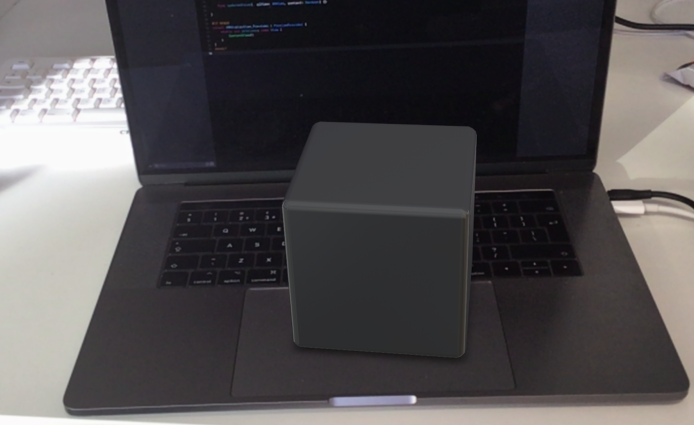

To place your own 3D image, you'll want to find 3D image files online. You should look for images with a .usdz file extension. These can get expensive, but if you look hard there are free ones out there as well.

ARKit is a great framework to import for AR apps in addition to RealityKit. You can use it by putting `import ARKit` at the top of your ViewController.swift file. 

Let's make an app where we place a 3D object onto the screen and we can move it after placing it. First, comment out the default code in `override func viewDidLoad()` in the ViewController.swift file. Instead let's write it like this:




In [ ]:
    override func viewDidLoad() {
        super.viewDidLoad()
        //set the delegate to self, this will be important later
        arView.session.delegate = self
        //for simplicity, we'll automatically configure the settings
        arView.automaticallyConfigureSession = true
        //when someone taps the screen, we want to handle that
        //this line says recognize when someone taps, and when they do send them to the handleTap method
        arView.addGestureRecognizer(UITapGestureRecognizer(target: self, action: #selector(handleTap(recognizer:))))
    }

In the method we just wrote, we said when the screen is tapped go to the handleTap method. However, this method doesn't exist yet so let's write it:

In [ ]:
    @objc func handleTap(recognizer: UITapGestureRecognizer){
            //get the location on the screen that was tapped
            let location = recognizer.location(in: arView)
            let results = arView.raycast(from: location, allowing: .estimatedPlane, alignment: .horizontal)
            //if the ARView recognizes this as a surface, add the anchor
            //an anchor connects the 3D image and the real world location that was tapped
            if let firstResult = results.first {
                //my 3D image is named baxter.usdz
                let anchor = ARAnchor(name: "baxter.usdz", transform: firstResult.worldTransform)
                arView.session.add(anchor: anchor)
            }else{
                //if no surface was recognized, this will print to the console in Xcode
                print("No surface found - could not place obj")
            }
        }

The anchor doesn't magically get placed on the screen. So let's write a method to handle adding the anchor to the session. This method should go at the end of the file AFTER the last semicolon.

In [ ]:
//earlier we set the session delegate to self, but now we need to handle what the delegate actually does
extension ViewController: ARSessionDelegate{
    func session(_ session: ARSession, didAdd anchors: [ARAnchor]) {
        //loop through the anchors we want to add
        for anchor in anchors{
            if let anchorName = anchor.name, anchorName == "baxter.usdz"{
                //place the object attached to the anchor
                placeObject(named: anchorName, for: anchor)
            }
        }
    }
}

Now we've called `placeObject`, but we this method doesn't exist. This is the last method we have to write! It should go after the `handleTap` method.

In [ ]:
    func placeObject(named entityName: String, for anchor: ARAnchor){
        //create the ModelEntity
        //all 3D objects we place will be entities
        let entity = try! ModelEntity.loadModel(named: entityName)
        //the next two lines gives us the ability to move the object after it's placed
        entity.generateCollisionShapes(recursive: true)
        arView.installGestures([.rotation, .translation], for: entity)
        //create an anchor entity
        let anchorEntity = AnchorEntity(anchor: anchor) 
        //add the entity to the anchor so it will be attached to the right location on the screen
        anchorEntity.addChild(entity)
        //add the anchor to the scene, which puts it on the screen
        arView.scene.addAnchor(anchorEntity)
    }

Finally we can test our code! When testing an AR app, you want to move the camera around before actually testing your code. This will let the ARView look for potential surfaces to place objects on. After you move the camera around for a bit, then you can tap the screen to start testing your object placement. 

This was only a start at using ARKit and RealityKit. Something cool to check out for further work with AR apps is tracking configurations. ARKit has different tracking configurations you can choose from. This means that you could focus your AR element on the world (generally anything the camera sees), a face using the selfie camera, or a variety of other things. You can see the full list [here](https://developer.apple.com/documentation/arkit/arconfiguration). 
